# Description

This notebook is the second part of transfer learning topic (saving the model, loading the model, changing the loaded model).

# Tasks

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import time
from glob import glob
from termcolor import colored

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torch import optim
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models

from matplotlib import pyplot as plt

Task 1. Dealing with the state_dict. 

__Define model__

In [2]:
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
model = TheModelClass()

In [4]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

__Display model's state_dict and optimizer's state_dict__

In [5]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


In [6]:
# print("Model's state_dict:")
# for var_name in model.state_dict():
#     print(var_name, "\t", model.state_dict()[var_name])

In [7]:
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


Task 2. Save and load the model for the test.

In [8]:
# save model
torch.save(model.state_dict(), "data/model_test.pt")

In [9]:
# load model
model.load_state_dict(torch.load("data/model_test.pt"))
model.eval()

# print("Model's state_dict:")
# for var_name in model.state_dict():
#     print(var_name, "\t", model.state_dict()[var_name])

TheModelClass(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Task 3. Save and load a checkpoint for inference and/or resume training.

In [10]:
# # model save particular checkpoint
# torch.save({'epoch': epoch,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': loss,
#             }, path)

# model = TheModelClass(*args, **kwargs)
# optimizer = TheOptimizerClass(*args, **kwargs)

# # model load particular checkpoint
# checkpoint = torch.load(PATH)
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

# # model.eval() / model.train()

Task 4. Save multiple models in one file.

In [11]:
# # save
# torch.save({'modelA_state_dict': modelA.state_dict(),
#             'modelB_state_dict': modelB.state_dict(),
#             'optimizerA_state_dict': optimizerA.state_dict(),
#             'optimizerB_state_dict': optimizerB.state_dict(),
#             }, path)

# # load
# modelA = TheModelAClass(*args, **kwargs)
# modelB = TheModelBClass(*args, **kwargs)
# optimizerA = TheOptimizerAClass(*args, **kwargs)
# optimizerB = TheOptimizerBClass(*args, **kwargs)

# checkpoint = torch.load(path)
# modelA.load_state_dict(checkpoint['modelA_state_dict'])
# modelB.load_state_dict(checkpoint['modelB_state_dict'])
# optimizerA.load_state_dict(checkpoint['optimizerA_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# # modelA.eval() / modelA.train()
# # modelB.eval() / modelB.train()

Task 5. Detection of malaria through image processing and machine learning. Data can be downloaded [here](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria) or [here](https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets).

__Visualize the images__

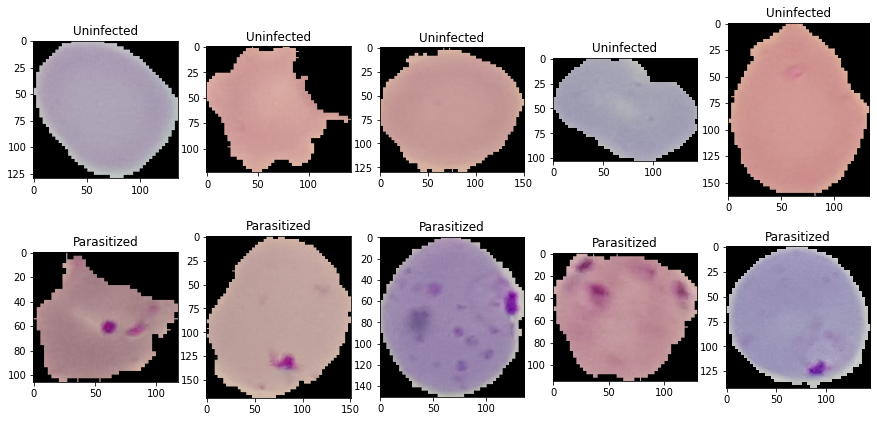

In [12]:
img_dir = './data/malaria_dataset/'
parasitized = os.listdir(img_dir + 'Parasitized/')
uninfected = os.listdir(img_dir + 'Uninfected/')

# example of images with and without infection
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
for i in range(5):
    ax[0][i].imshow(Image.open(img_dir + 'Uninfected/' + uninfected[i]))
    ax[1][i].imshow(Image.open(img_dir + 'Parasitized/' + parasitized[i]))
    ax[0][i].set_title('Uninfected')
    ax[1][i].set_title('Parasitized')

**Data augmentation**

In [13]:
train_transforms = transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
                                       transforms.RandomRotation(degrees=15),
                                       transforms.ColorJitter(),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.CenterCrop(size=224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                       ])

test_transforms = transforms.Compose([transforms.Resize(256), 
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(256), 
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

**Division of the dataset into train, val and test**

In [14]:
train_data = datasets.ImageFolder(img_dir, transform=train_transforms)
num_workers = 0
valid_size = 0.2
test_size = 0.1

In [15]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)

In [16]:
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]
print(len(valid_idx), len(test_idx), len(train_idx))

5511 2756 19291


In [17]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

In [18]:
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=10, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=10, sampler=test_sampler, num_workers=num_workers)

**Load model**

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.densenet121(pretrained=True)
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

**Transformation of the model for our task**

In [20]:
# freezing model parameters
for param in model.parameters():
    param.require_grad = False

In [21]:
# create our own classifier to predict two classes ouput
fc = nn.Sequential(nn.Linear(1024, 460),
                   nn.ReLU(),
                   nn.Dropout(0.4),
                   nn.Linear(460, 2),
                   nn.LogSoftmax(dim=1))

In [22]:
# replace densenet121 classifier to our classifier
model.classifier = fc
criterion = nn.NLLLoss()

In [23]:
# define optimizer
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.003)
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

**Training of the model and saving the control points of the best parameters of the model**

In [24]:
epochs = 10
valid_loss_min = np.Inf

for epoch in range(epochs):
    start = time.time()
    model.train()

    train_loss = 0.0
    valid_loss = 0.0
    accuracy = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        logps = model(inputs)
        loss = criterion(logps, labels)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    with torch.no_grad():
        accuracy = 0
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logps = model.forward(inputs)
            batch_loss = criterion(logps, labels)

            valid_loss += batch_loss.item()
    
            # calculate accuracy
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    # calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    valid_accuracy = accuracy / len(valid_loader)

    print('Epoch: {} \tTraining Loss: {:.4f} \tValidation Loss: {:.4f} \tValidation Accuracy: {:.4f}'.format(epoch + 1, train_loss, valid_loss, valid_accuracy))

    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.4f} --> {:.4f}). Saving model ...'.format(valid_loss_min, valid_loss))
        model_save_name = "Malaria.pt"
        path = f"data/{model_save_name}"
        torch.save(model.state_dict(), path)
        valid_loss_min = valid_loss

    print(f"Time per epoch: {(time.time() - start):.3f} seconds")

Epoch: 1 	Training Loss: 0.3951 	Validation Loss: 0.2468 	Validation Accuracy: 0.9040
Validation loss decreased (inf --> 0.2468). Saving model ...
Time per epoch: 325.924 seconds
Epoch: 2 	Training Loss: 0.3603 	Validation Loss: 0.2589 	Validation Accuracy: 0.8969
Time per epoch: 324.684 seconds
Epoch: 3 	Training Loss: 0.3396 	Validation Loss: 0.2319 	Validation Accuracy: 0.9163
Validation loss decreased (0.2468 --> 0.2319). Saving model ...
Time per epoch: 324.746 seconds
Epoch: 4 	Training Loss: 0.3417 	Validation Loss: 0.2331 	Validation Accuracy: 0.9232
Time per epoch: 324.355 seconds
Epoch: 5 	Training Loss: 0.3320 	Validation Loss: 0.2067 	Validation Accuracy: 0.9225
Validation loss decreased (0.2319 --> 0.2067). Saving model ...
Time per epoch: 321.595 seconds
Epoch: 6 	Training Loss: 0.3249 	Validation Loss: 0.2199 	Validation Accuracy: 0.9080
Time per epoch: 321.565 seconds
Epoch: 7 	Training Loss: 0.3300 	Validation Loss: 0.2178 	Validation Accuracy: 0.9139
Time per epoch: 3

**Load a saved model from disk** 

In [25]:
model.load_state_dict(torch.load('./data/Malaria.pt'));

**Test results**

In [26]:
def test(model, criterion):
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(test_loader):
        
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        output = model(data)
        loss = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        pred = output.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print('Test Loss: {:.6f}'.format(test_loss))
    print('Test Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total)) 

In [27]:
test(model, criterion)

Test Loss: 0.204562
Test Accuracy: 91% (2532/2756)


**Visualization of results**

In [28]:
def load_input_image(img_path):
    image = Image.open(img_path)
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [29]:
def predict_malaria(model, class_names, img_path):
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

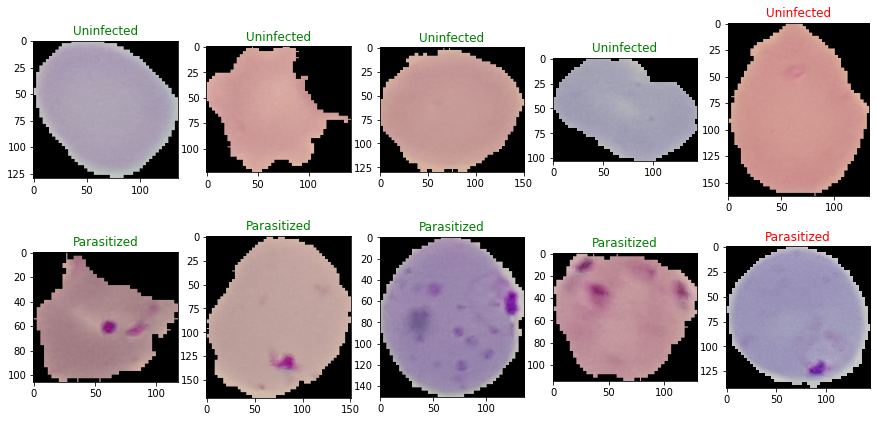

In [30]:
class_names = train_data.classes
parasitized = os.listdir(img_dir + 'Parasitized/')
uninfected = os.listdir(img_dir + 'Uninfected/')

fig, ax = plt.subplots(2, 5, figsize=(15, 7))
for i in range(5):

    # predict uninfected
    img_path_uninfected = img_dir + 'Uninfected/' + uninfected[i]
    img_uninfected = Image.open(img_path_uninfected)
    color_unf = 'green' if predict_malaria(model, class_names, img_path_uninfected) == 'Uninfected' else 'red'  
    ax[0][i].imshow(img_uninfected)
    ax[0][i].set_title('Uninfected', color=color_unf)
    
    # predict parasitized
    img_path_parasitized = img_dir + 'Parasitized/' + parasitized[i]
    img_parasitized = Image.open(img_path_parasitized)
    color_inf = 'green' if predict_malaria(model, class_names, img_path_parasitized) == 'Parasitized' else 'red'        
    ax[1][i].imshow(img_parasitized)
    ax[1][i].set_title('Parasitized', color=color_inf)

Task 6. Classification of pneumonia through image processing and machine learning. Data can be downloaded [here](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia).

**Visualize the images**

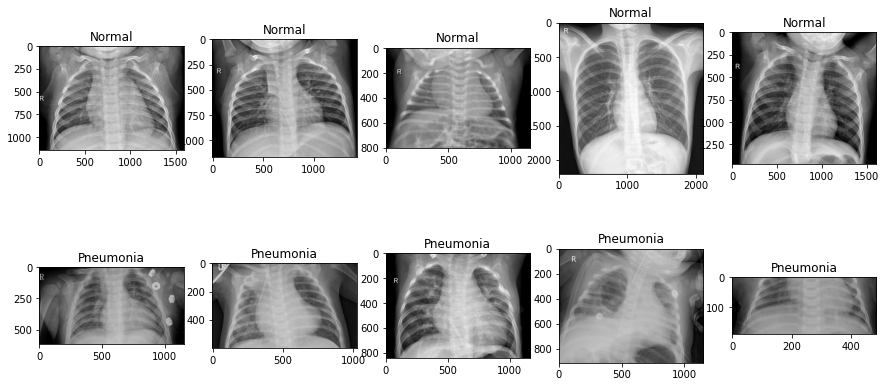

In [31]:
img_dir = './data/pneumonia_dataset/'
normal = os.listdir(img_dir + 'NORMAL/')
pneumonia = os.listdir(img_dir + 'PNEUMONIA/')

# example of images with and without infection
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
for i in range(5):
    ax[0][i].imshow(Image.open(img_dir + 'NORMAL/' + normal[i]), cmap='gray')
    ax[1][i].imshow(Image.open(img_dir + 'PNEUMONIA/' + pneumonia[i]), cmap='gray')
    ax[0][i].set_title('Normal')
    ax[1][i].set_title('Pneumonia')

**Data augmentation**

In [32]:
train_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.RandomRotation(degrees=15),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.CenterCrop(size=224),
                                       transforms.Grayscale(1),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(256), 
                                      transforms.CenterCrop(224),
                                      transforms.Grayscale(1),
                                      transforms.ToTensor()])

validation_transforms = transforms.Compose([transforms.Resize(256), 
                                            transforms.CenterCrop(224),
                                            transforms.Grayscale(1),
                                            transforms.ToTensor()])

**Division of the dataset into train, val and test**

In [33]:
train_data = datasets.ImageFolder(img_dir, transform=train_transforms)
num_workers = 0
valid_size = 0.2
test_size = 0.1

In [34]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)

In [35]:
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]
print(len(valid_idx), len(test_idx), len(train_idx))

1171 585 4100


In [36]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

In [37]:
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=test_sampler, num_workers=num_workers)

**Load model**

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=False)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**Transformation of the model for our task**

In [39]:
# create our own input
conv1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False))

In [40]:
# create our own classifier to predict two classes ouput
fc = nn.Sequential(nn.Linear(2048, 1024),
                   nn.ReLU(),
                   nn.Linear(1024, 460),
                   nn.ReLU(),
                   nn.Dropout(0.4),
                   nn.Linear(460, 2))

In [41]:
# replace resnet50 classifier to our classifier
model.conv1 = conv1
model.fc = fc
criterion = nn.CrossEntropyLoss()

In [42]:
# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.to(device)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel

**Training of the model and saving the control points of the best parameters of the model**

In [43]:
epochs = 10

for epoch in range(epochs):
    start = time.time()
    model.train()

    train_loss = 0.0
    valid_loss = 0.0
    valid_acc = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        preds = model(inputs)
        loss = criterion(preds, labels)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    with torch.no_grad():
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            val_preds = model.forward(inputs)
            val_loss = criterion(val_preds, labels)
            val_accuracy = (val_preds.argmax(dim=1) == labels).float().mean().data.cpu()

            valid_loss += val_loss.item()
            valid_acc += val_accuracy

    # calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    valid_accuracy = valid_acc / len(valid_loader)

    print('Epoch: {} \tTraining Loss: {:.4f} \tValidation Loss: {:.4f} \tValidation Accuracy: {:.4f}'.format(epoch + 1, train_loss, valid_loss, valid_accuracy))
    print(f"Time per epoch: {(time.time() - start):.3f} seconds")
    
    
path = "data/Pneumonia.pt"
torch.save(model.state_dict(), path)

Epoch: 1 	Training Loss: 0.2923 	Validation Loss: 0.7696 	Validation Accuracy: 0.7088
Time per epoch: 104.098 seconds
Epoch: 2 	Training Loss: 0.2160 	Validation Loss: 14.4475 	Validation Accuracy: 0.2841
Time per epoch: 103.962 seconds
Epoch: 3 	Training Loss: 0.2329 	Validation Loss: 1.6501 	Validation Accuracy: 0.3309
Time per epoch: 103.473 seconds
Epoch: 4 	Training Loss: 0.1935 	Validation Loss: 0.1824 	Validation Accuracy: 0.9282
Time per epoch: 101.326 seconds
Epoch: 5 	Training Loss: 0.1958 	Validation Loss: 0.1673 	Validation Accuracy: 0.9375
Time per epoch: 101.207 seconds
Epoch: 6 	Training Loss: 0.2129 	Validation Loss: 0.2053 	Validation Accuracy: 0.9251
Time per epoch: 101.588 seconds
Epoch: 7 	Training Loss: 0.1928 	Validation Loss: 0.3923 	Validation Accuracy: 0.8319
Time per epoch: 101.463 seconds
Epoch: 8 	Training Loss: 0.1782 	Validation Loss: 0.2481 	Validation Accuracy: 0.8938
Time per epoch: 101.272 seconds
Epoch: 9 	Training Loss: 0.1761 	Validation Loss: 0.642

**Load a saved model from disk**

In [44]:
model.load_state_dict(torch.load('./data/Pneumonia.pt'));

**Test results**

In [45]:
def test(model, criterion):
    test_loss = 0.
    test_acc = 0.

    for batch_idx, (data, target) in enumerate(test_loader):

        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
            
        preds = model(data)
        loss = criterion(preds, target)
        accuracy = (preds.argmax(dim=1) == target).float().mean().data.cpu()
        
        test_loss += loss.item()
        test_acc += accuracy
        break
        
    batch_loss = np.round(test_loss / len(test_loader), 4)
    batch_accuracy = np.round(test_acc / len(test_loader), 4)
        

    print('Test Loss: {:.4f}'.format(batch_loss))
    print('Test Accuracy: {:.4f}'.format((100. * test_acc)))

In [46]:
test(model, criterion)

Test Loss: 0.0032
Test Accuracy: 100.0000


**Visualization of results**

In [47]:
def load_input_image(img_path):
    image = Image.open(img_path)
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                               transforms.Grayscale(1),
                                               transforms.ToTensor()])
    image = prediction_transform(image).unsqueeze(0)
    return image

In [48]:
def predict_pneumonia(model, class_names, img_path):
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

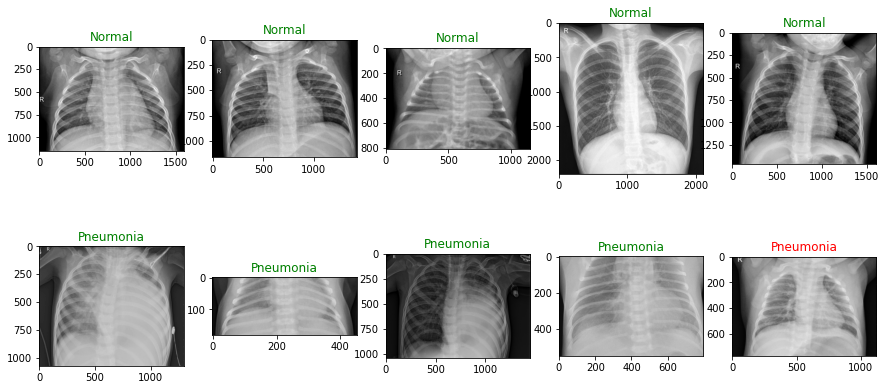

In [67]:
class_names = train_data.classes
pneumonia = os.listdir((img_dir + "PNEUMONIA/"))
normal = os.listdir((img_dir + "NORMAL/"))

fig, ax = plt.subplots(2, 5, figsize=(15, 7))
for i in range(5):

    # predict normal
    img_path_normal = img_dir + 'NORMAL/' + normal[i]
    img_normal = Image.open(img_path_normal)
    color_normal = 'green' if predict_malaria(model, class_names, img_path_normal) == 'NORMAL' else 'red'  
    ax[0][i].imshow(img_normal, cmap='gray')
    ax[0][i].set_title('Normal', color=color_normal)
    
    # predict pneumonia
    img_path_pneumonia = img_dir + 'PNEUMONIA/' + pneumonia[i]
    img_pneumonia = Image.open(img_path_pneumonia)
    color_pneumonia = 'green' if predict_malaria(model, class_names, img_path_pneumonia) == 'PNEUMONIA' else 'red'        
    ax[1][i].imshow(img_pneumonia, cmap='gray')
    ax[1][i].set_title('Pneumonia', color=color_pneumonia)